# **The Sparks Foundation #GRIPMAY21**

## **Data Science & Business Analytics Tasks:**
### **Task 1 - Prediction using Supervised ML**
### **By - Sourav Sarkar**

# Python Scikit Learn

Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN.

## Linear Regression with Python Scikit Learn

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables and then we will move towards linear regression involving multiple variables.

## Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Importing necesaary libraries for the task:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Import the data using pandas:

In [2]:
dt = pd.read_csv("student_scores.csv")
print("Data imported successfully!")

Data imported successfully!


Let's check the first 10 data of the dataset:

In [3]:
dt.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Now let's seen the concise summary of the dataset:

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Here, we can see we have a total of 25 non-null data entries in the dataset consists of two columns of both float and int datatypes. Now let's view some basic statistical details: 

In [5]:
dt.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Let's plot our data points on a 2-D graph using matplotlib to check pur dataset and see if we can manually find any relationship between the data:

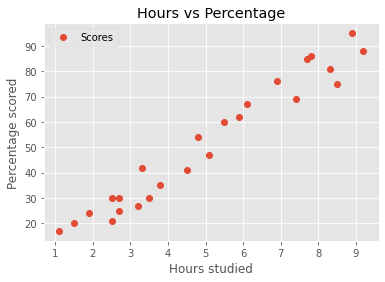

In [6]:
dt.plot(x="Hours", y="Scores", style="o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")
plt.show()

#### Here we observe that there is a positive linear relation between the number of hours studied and percentage scored.

Therefore, we can use the linear regression technique to predict the nect values. But first we need to train and test our given dataset.

### Prepare The Data

Now we have an idea about statistical details of our data. The next step is to divide the data into "attributes" and "labels". Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset we only have two columns. We want to predict the percentage score depending upon the hours studied. Therefore our attribute set will consist of the "Hours" column, and the label will be the "Score" column. This is as follows:

In [7]:
X = dt.iloc[:,:-1].values
y = dt.iloc[:,1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in <code>train_test_split()</code> method:

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

The above script splits 80% of the data to training set and remaining 20% of the data to testing set. The <code>test_size</code> variable we actually specify the proportion of the test set.

The very next process is to train the algorithm, thus the step include the following:

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete.")

Training complete.


Now let's plot the regressor line into the graph. The line is can be represented by <code>y=mx+c</code>, where m is the coefficient and c is the intercept:

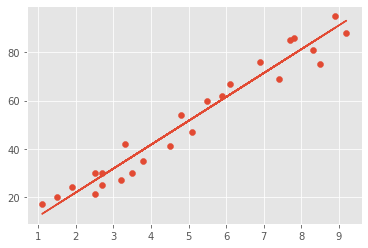

In [11]:
line = regressor.coef_ * X + regressor.intercept_
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

#### Making Predictions

Predicting the scores for the model is the next important step towards knowing our model:

In [12]:
print(X_test) # Testing Data - in Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Now let's compare the actual data with the predicted data:

In [13]:
new_dt = pd.DataFrame({'Actually':y_test, 'Predicted':y_pred})
print(new_dt)

   Actually  Predicted
0        20  16.884145
1        27  33.732261
2        69  75.357018
3        30  26.794801
4        62  60.491033


Now it's time to test our model with sample testing hours, so in this case, we take 9.5 hours, i.e, if a student studies for nine and a half hours, approximately how many marks he can get based on the data we received and the model we applied.

In [14]:
hours = [[9.5]]
own_pred = regressor.predict(hours)  
print("Number of hours = {}".format(hours[0][0]))  
print("Prediction Score = {}".format(own_pred[0])) 

Number of hours = 9.5
Prediction Score = 96.16939660753592


#### Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [15]:
from sklearn import metrics 

In [16]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367


**You can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job.**